In [1]:
import requests

In [2]:
api_key= 'c62690a9cb76412088a2427a2394b72f'

In [3]:
#ticker = 'INFY'
#interval = '1day'

api_url = 'https://api.twelvedata.com/time_series?symbol=INFY:BSE&interval=1day&outputsize=200&apikey=demo'

data = requests.get(api_url).json()

In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 

In [5]:
data1= pd.DataFrame(data['values'])
data1

,datetime,open,high,low,close,volume
0,2021-10-14,1749.00000,1783.94995,1711.00000,1715.44995,393432
1,2021-10-13,1692.00000,1713.50000,1681.30005,1708.69995,130135
2,2021-10-12,1684.00000,1689.00000,1662.00000,1684.80005,313692
3,2021-10-11,1678.15002,1730.30005,1663.94995,1692.00000,240721
4,2021-10-08,1704.00000,1731.00000,1698.19995,1723.55005,343733
...,...,...,...,...,...,...
195,2020-12-31,1244.90002,1258.15002,1239.00000,1255.84998,157186
196,2020-12-30,1252.90002,1253.90002,1238.55005,1246.19995,139790
197,2020-12-29,1237.00000,1254.50000,1236.55005,1250.15002,241078
198,2020-12-28,1237.34998,1248.00000,1236.15002,1240.09998,252593


In [6]:
data1["datetime"] = data1['datetime'].str.replace('-', '').astype(float)
data1=data1.astype(float)

In [7]:
data1.shape

(200, 6)

In [8]:
data1.head()

,datetime,open,high,low,close,volume
0,20211014.0,1749.00000,1783.94995,1711.00000,1715.44995,393432.0
1,20211013.0,1692.00000,1713.50000,1681.30005,1708.69995,130135.0
2,20211012.0,1684.00000,1689.00000,1662.00000,1684.80005,313692.0
3,20211011.0,1678.15002,1730.30005,1663.94995,1692.00000,240721.0
4,20211008.0,1704.00000,1731.00000,1698.19995,1723.55005,343733.0


In [9]:
data1.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  200 non-null    float64
 1   open      200 non-null    float64
 2   high      200 non-null    float64
 3   low       200 non-null    float64
 4   close     200 non-null    float64
 5   volume    200 non-null    float64
dtypes: float64(6)
memory usage: 9.5 KB


In [11]:
data1.describe()

,datetime,open,high,low,close,volume
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,2.021031e+07,1468.532747,1482.389249,1454.228002,1468.158747,4.635983e+05
std,1.483357e+03,162.730315,163.846604,162.989722,163.678769,5.947198e+05
min,2.020122e+07,1237.000000,1248.000000,1226.099980,1236.349980,5.555100e+04
25%,2.021031e+07,1337.012485,1349.474975,1320.187473,1336.300050,1.576532e+05
50%,2.021052e+07,1393.275025,1405.625000,1381.025020,1395.500000,2.667030e+05
75%,2.021080e+07,1643.500000,1659.212462,1637.137510,1649.450010,4.463272e+05
max,2.021101e+07,1770.849980,1787.500000,1752.199950,1763.449950,4.505456e+06


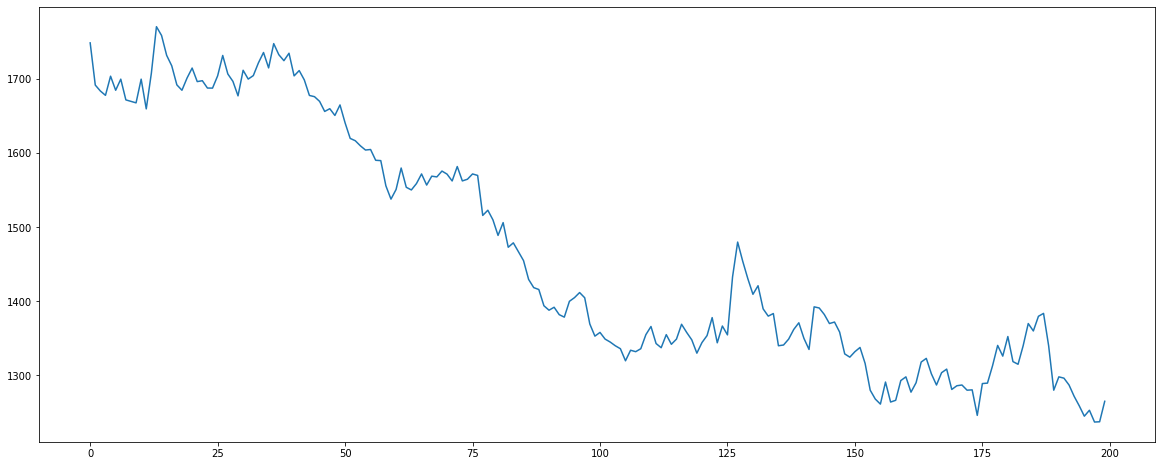

In [12]:
data1['open'].plot(figsize=(20,8))

In [13]:

x = data1[['open', 'high', 'low', 'volume']]
y = data1['close']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state = 100)

In [15]:
x_train.shape

(160, 4)

In [16]:
x_test.shape

(40, 4)

In [17]:
y.head()

0    1715.44995
1    1708.69995
2    1684.80005
3    1692.00000
4    1723.55005
Name: close, dtype: float64

In [18]:
x.head()

,open,high,low,volume
0,1749.00000,1783.94995,1711.00000,393432.0
1,1692.00000,1713.50000,1681.30005,130135.0
2,1684.00000,1689.00000,1662.00000,313692.0
3,1678.15002,1730.30005,1663.94995,240721.0
4,1704.00000,1731.00000,1698.19995,343733.0


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
LR = LinearRegression()

In [20]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(LR.coef_)

[-4.98633388e-01  7.20127873e-01  7.76983063e-01  1.89888879e-06]


In [22]:
print(LR.intercept_)

2.1769073799434864


In [23]:
predicted = LR.predict(x_test)
print(predicted)

[1391.48489004 1338.15512003 1364.35786093 1390.79566229 1354.30351613
 1289.31915984 1356.11741857 1402.17771866 1613.13390242 1569.16756149
 1315.00724137 1357.17302452 1325.56309021 1274.04637348 1339.21502369
 1243.0053376  1261.18131187 1302.64056406 1295.20845447 1700.84291737
 1688.4896445  1583.06888154 1739.56078906 1701.0335684  1404.85830205
 1436.21225097 1381.4006245  1494.24140171 1371.41990055 1362.01879744
 1478.15834148 1550.13874497 1350.95060692 1283.12340736 1269.71926225
 1551.21973088 1703.52651892 1278.50951449 1265.5724422  1470.80489642]


In [ ]:
predicted.shape

(40,)

In [24]:
dfr=pd.DataFrame(y_test,predicted)

In [25]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [26]:
print(dfr)

     Actual Price  Predicted Price
126    1398.59998      1391.484890
104    1339.94995      1338.155120
99     1361.90002      1364.357861
92     1389.50000      1390.795662
111    1361.15002      1354.303516
167    1296.09998      1289.319160
116    1355.55005      1356.117419
96     1404.80005      1402.177719
52     1610.25000      1613.133902
69     1562.50000      1569.167561
164    1309.69995      1315.007241
124    1352.55005      1357.173025
182    1317.05005      1325.563090
154    1268.69995      1274.046373
125    1361.50000      1339.215024
196    1246.19995      1243.005338
194    1260.40002      1261.181312
177    1301.75000      1302.640564
163    1290.09998      1295.208454
31     1704.15002      1700.842917
11     1689.90002      1688.489645
73     1581.25000      1583.068882
15     1741.69995      1739.560789
41     1704.75000      1701.033568
97     1404.65002      1404.858302
128    1440.75000      1436.212251
133    1385.30005      1381.400624
82     1497.05005   

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
LR.score(x_test,y_test)

0.9979571075157709

In [29]:
import math

In [30]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 4.581441663853525


In [31]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 42.04476222357645


In [32]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 6.484193259271075


In [33]:
graph=dfr.head(20)

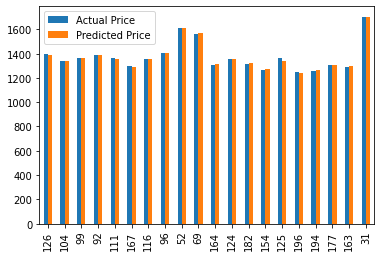

In [34]:
graph.plot(kind='bar')